##### Sprintの目的
データセットを作成し学習する
データ拡張を行う

In [1]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [2]:
#!pip install tensorflow==1.13.1

In [3]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### 自作データセットの学習
自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

##### globを使用したイメージの読み込み

In [5]:
path = './train' 
img_list = glob.glob(path + '/*' + ".jpg")

In [6]:
img_list

['./train/dog5.jpg',
 './train/dog4.jpg',
 './train/dog3.jpg',
 './train/dog2.jpg',
 './train/dog1.jpg',
 './train/cat1.jpg',
 './train/cat2.jpg',
 './train/cat3.jpg',
 './train/cat4.jpg',
 './train/cat5.jpg']

##### イメージのロード、配列化、リサイズ、データセット作成

In [7]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [8]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [9]:
cat_img_array.shape

(5, 224, 224, 3)

##### イメージの出力

In [10]:
# 配列のまま出力

print('データ型:', cat_img_array[1].dtype)
print("shape :", cat_img_array[1].shape)

cat_img_array[1]

データ型: float64
shape : (224, 224, 3)


array([[[0.61176471, 0.55686275, 0.44313725],
        [0.61568627, 0.57254902, 0.4627451 ],
        [0.62352941, 0.57647059, 0.4745098 ],
        ...,
        [0.67058824, 0.63921569, 0.55686275],
        [0.6627451 , 0.63529412, 0.53333333],
        [0.6627451 , 0.62352941, 0.51764706]],

       [[0.60784314, 0.55294118, 0.43921569],
        [0.61568627, 0.57254902, 0.4627451 ],
        [0.63137255, 0.58823529, 0.47843137],
        ...,
        [0.67058824, 0.63921569, 0.54901961],
        [0.66666667, 0.63921569, 0.5372549 ],
        [0.65882353, 0.63137255, 0.52156863]],

       [[0.61960784, 0.57647059, 0.45882353],
        [0.62352941, 0.57647059, 0.4745098 ],
        [0.61176471, 0.57647059, 0.4627451 ],
        ...,
        [0.6627451 , 0.63137255, 0.54117647],
        [0.65882353, 0.63137255, 0.52941176],
        [0.65098039, 0.62352941, 0.52156863]],

       ...,

       [[0.59215686, 0.54117647, 0.40784314],
        [0.58823529, 0.5372549 , 0.40392157],
        [0.58823529, 0

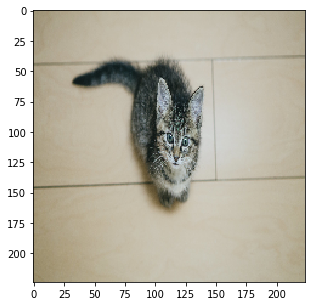

In [11]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[1])

plt.show()

##### Kerasでも読み込んでみよう

In [12]:
from keras.preprocessing.image import load_img, img_to_array

Using TensorFlow backend.


In [13]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.5372549 , 0.627451  , 0.7490196 ],
        [0.54509807, 0.63529414, 0.75686276],
        [0.54901963, 0.6392157 , 0.7607843 ],
        ...,
        [0.64705884, 0.7176471 , 0.8117647 ],
        [0.6431373 , 0.7058824 , 0.8039216 ],
        [0.6431373 , 0.7058824 , 0.8039216 ]],

       [[0.54509807, 0.627451  , 0.7490196 ],
        [0.54509807, 0.63529414, 0.75686276],
        [0.5529412 , 0.6431373 , 0.7647059 ],
        ...,
        [0.6745098 , 0.72156864, 0.8156863 ],
        [0.67058825, 0.7176471 , 0.8117647 ],
        [0.6666667 , 0.7137255 , 0.80784315]],

       [[0.5647059 , 0.64705884, 0.7607843 ],
        [0.56078434, 0.6431373 , 0.75686276],
        [0.5568628 , 0.64705884, 0.76862746],
        ...,
        [0.6862745 , 0.73333335, 0.81960785],
        [0.6784314 , 0.7254902 , 0.81960785],
        [0.67058825, 0.7176471 , 0.8117647 ]],

       ...,

       [[1.        , 0.99215686, 0.98039216],
        [0.99215686, 0.98039216, 0.9529412 ],
        [0.9882353 , 0

<class 'PIL.Image.Image'>


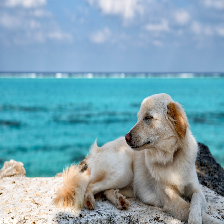

In [14]:
print(type(img_keras))

img_keras

##### Resizeについて

In [15]:
!pip3 install opencv-python

In [16]:
!pip list

Package                            Version
---------------------------------- -----------
absl-py                            0.9.0
alabaster                          0.7.11
albumentations                     0.4.6
anaconda-client                    1.7.2
anaconda-navigator                 1.9.2
anaconda-project                   0.8.2
appdirs                            1.4.3
appnope                            0.1.0
appscript                          1.0.1
asn1crypto                         0.24.0
astor                              0.8.1
astroid                            2.0.4
astropy                            3.0.4
atomicwrites                       1.2.1
attrs                              18.2.0
Automat                            0.7.0
Babel                              2.6.0
backcall                           0.1.0
backports.shutil-get-terminal-size 1.0.0
bcrypt                             3.1.7
beautifulsoup4                     4.6.3
bitarray                           0.8.3
bkcha

In [17]:
import cv2

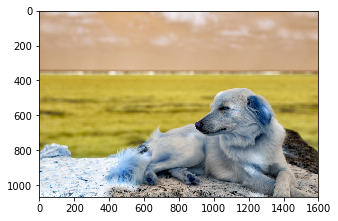

In [18]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

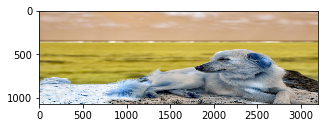

In [19]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

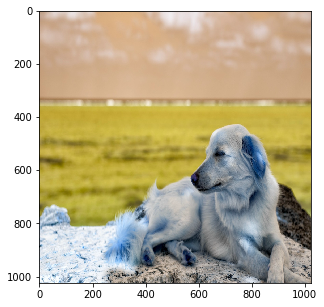

In [20]:
img = cv2.imread(img_list[4])


# cv2でリサイズ　ピクセル補間の方法も指定できる
'''
cv2.INTER_NEAREST :最近傍補間
cv2.INTER_LINEAR :双線形補間（拡大むき）
cv2.INTER_AREA :平均画素法。モアレを軽減させる内挿（縮小むき）
cv2.INTER_CUBIC:4×4 の近傍領域を利用するバイキュービック補間（拡大むき）
cv2.INTER_LANCZOS4:8×8 の近傍領域を利用する Lanczos法の補間

下に行くほど計算時間がかかる



https://www.tech-tech.xyz/opecv_resize.html

http://tessy.org/wiki/index.php?%B2%E8%C1%FC%A4%CE%A5%EA%A5%B5%A5%A4%A5%BA

https://github.com/ArunJayan/OpenCV-Python/search?q=cv2.resize&unscoped_q=cv2.resize

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/

'''

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

##### openCVの色形式

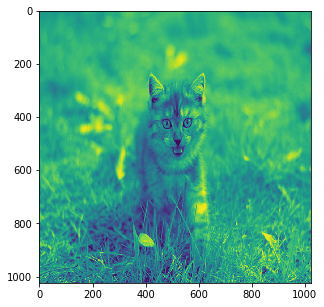

In [21]:
#グレースケール

# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [22]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

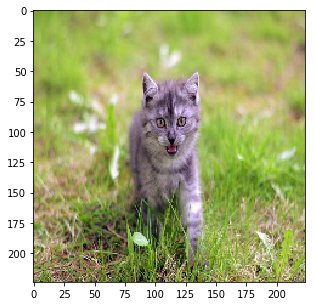

In [23]:
#BGRとRGB

'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

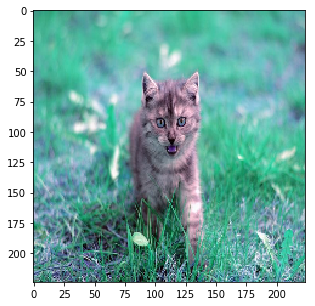

In [24]:
# BGRチャネル

plt.imshow(img)

plt.show()

#### 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [25]:
#学習データの作成
X = np.concatenate([dog_img_array, cat_img_array], axis=0)
print("X :", X.shape)

y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1]).reshape(-1, 1) #犬が0、猫が1
print("y :", y.shape)

X : (10, 224, 224, 3)
y : (10, 1)


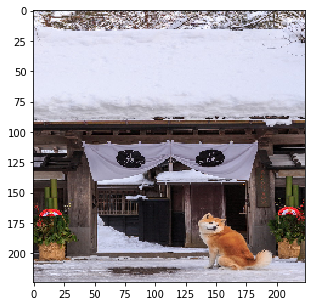

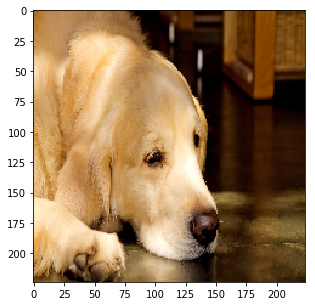

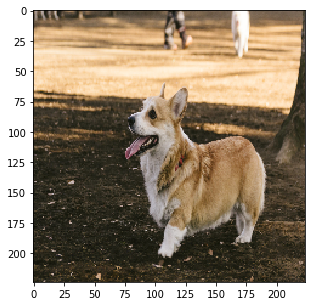

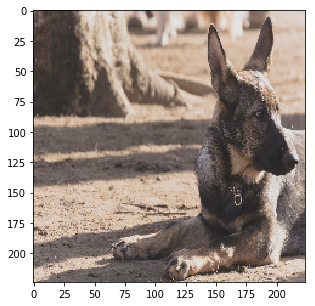

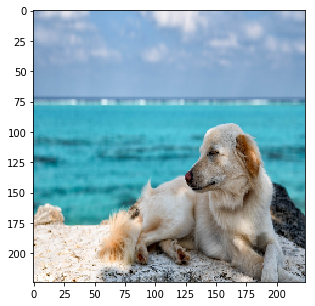

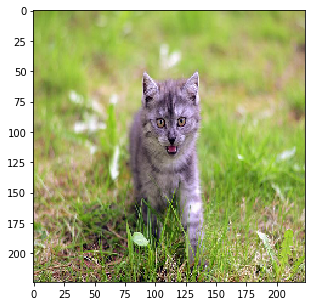

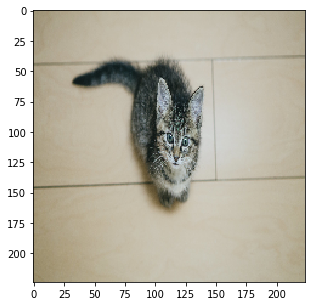

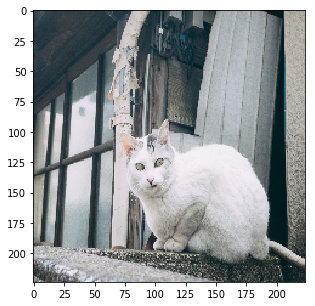

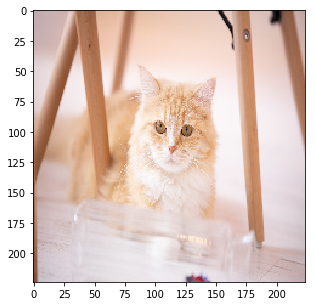

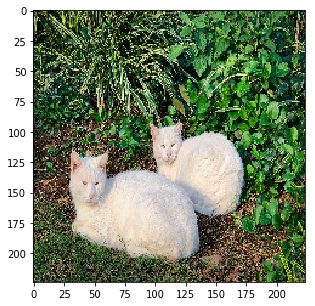

In [26]:
for i in range(X.shape[0]):
    plt.imshow(X[i])
    plt.show()

[初心者のための畳み込みニューラルネットワーク（MNISTデータセット + Kerasを使ってCNNを構築）](https://www.codexa.net/cnn-mnist-keras-beginner/)

[TensorFlow, Kerasの基本的な使い方（モデル構築・訓練・評価・予測）](https://note.nkmk.me/python-tensorflow-keras-basics/)

In [27]:
from keras import backend as K
K.clear_session()

In [28]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

# NNモデルの構築
model = tf.keras.Sequential()

model.add(layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.Conv2D(8, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

# モデルのコンパイル（学習に関する設定も含む）
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 22472)             0         
_________________________________________________________________
dens

In [29]:
# モデルのトレーニング（学習・訓練）
history = model.fit(X, y, batch_size=5, epochs=15, verbose=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
10/10 [==============================] - 1s 93ms/sample - loss: 1.1189 - acc: 0.2000
Epoch 2/15
10/10 [==============================] - 1s 74ms/sample - loss: 0.6720 - acc: 0.5000
Epoch 3/15
10/10 [==============================] - 1s 80ms/sample - loss: 0.6833 - acc: 0.8000
Epoch 4/15
10/10 [==============================] - 1s 74ms/sample - loss: 0.6514 - acc: 1.0000
Epoch 5/15
10/10 [==============================] - 1s 71ms/sample - loss: 0.5967 - acc: 0.8000
Epoch 6/15
10/10 [==============================] - 1s 72ms/sample - loss: 0.5289 - acc: 0.8000
Epoch 7/15
10/10 [==============================] - 1s 70ms/sample - loss: 0.4257 - acc: 0.9000
Epoch 8/15
10/10 [==============================] - 1s 71ms/sample - loss: 0.3140 - acc: 1.0000
Epoch 9/15
10/10 [==============================] - 1s 66ms/sample - loss: 0.2102 - acc: 1.0000
Epoch 10/15
10/10 [==============================] - 1s 67ms/sample - loss: 0.1003 - acc

In [30]:
#テストデータの取得

path2 = './test' 
img_list2 = glob.glob(path2 + '/*' + ".jpg")

In [31]:
img_list2

['./test/cat_1.jpg',
 './test/cat_2.jpg',
 './test/cat_3.jpg',
 './test/cat_6.jpg',
 './test/dog_6.jpg',
 './test/dog_1.jpg',
 './test/dog_3.jpg']

In [32]:
# np.resizeはだめ、ぜったい

dog_img_array2 = np.empty((0,224,224,3))
cat_img_array2 = np.empty((0,224,224,3))

for img in img_list2:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        dog_img_ = dog_img_.convert("RGB")
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array2 = np.concatenate([dog_img_array2, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.convert("RGB")
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.

        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array2 = np.concatenate([cat_img_array2, cat_img], axis = 0)
        
        cat_img_.close()

In [33]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array2.shape, cat_img_array2.shape))

dog_image:(3, 224, 224, 3)  cat_image:(4, 224, 224, 3)


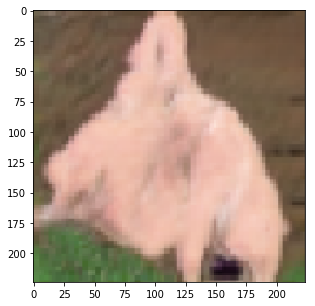

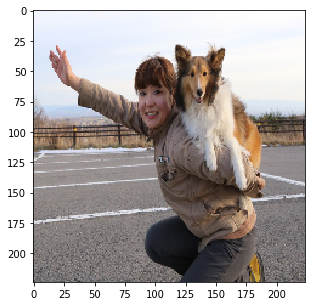

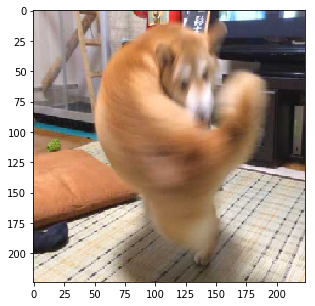

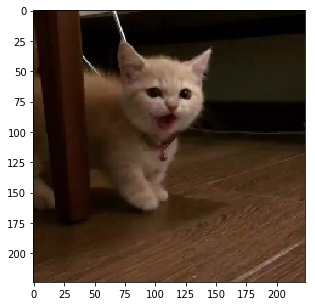

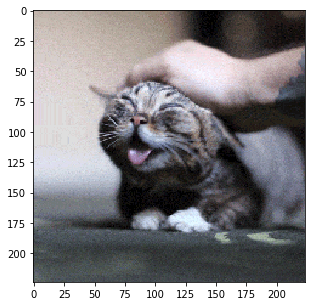

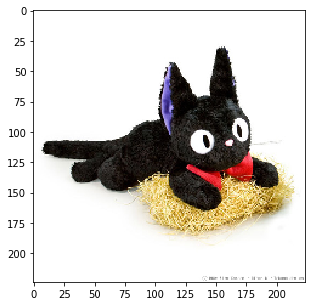

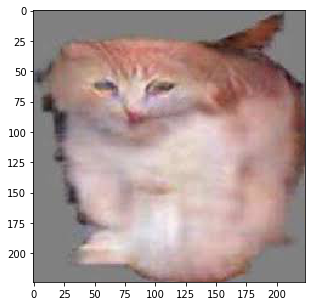

In [34]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

for i in range(len(dog_img_array2)):
    plt.imshow(dog_img_array2[i])
    plt.show()
    
for j in range(len(cat_img_array2)):
    plt.imshow(cat_img_array2[j])
    plt.show()

In [35]:
X_test = np.concatenate([dog_img_array2, cat_img_array2], axis=0)
print("X_test :", X_test.shape)

y_test = np.array([0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1) #犬が0、猫が1
print("y_test :", y_test.shape)

X_test : (7, 224, 224, 3)
y_test : (7, 1)


In [36]:
model.predict_proba(X_test)

array([[0.06407729],
       [0.38636532],
       [0.3663788 ],
       [0.51246375],
       [0.39736044],
       [0.00219688],
       [0.22760752]], dtype=float32)

In [37]:
score = model.evaluate(X_test, y_test)
print("test_accuracy : ", score[1])

7/7 [==============================] - 0s 30ms/sample - loss: 1.4576 - acc: 0.5714
test_accuracy :  0.5714286


#### 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations)


また、Kerasを使う場合はImageDataGeneratorも便利です。




《データ拡張の効果の調査》


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

[画像データ拡張ライブラリ ~ albumentations ~](https://qiita.com/Takayoshi_Makabe/items/79c8a5ba692aa94043f7)

##### albumentations

In [38]:
import albumentations as albu

In [39]:
img_list_aug = img_list
img_list_aug

['./train/dog5.jpg',
 './train/dog4.jpg',
 './train/dog3.jpg',
 './train/dog2.jpg',
 './train/dog1.jpg',
 './train/cat1.jpg',
 './train/cat2.jpg',
 './train/cat3.jpg',
 './train/cat4.jpg',
 './train/cat5.jpg']

albumentationsの使い方の確認

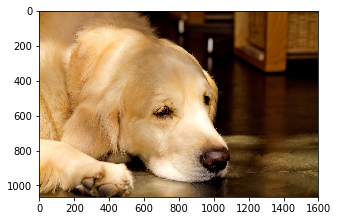

In [40]:
#元画像
img = cv2.imread(img_list_aug[1])
img_r = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #色(plane)の並びをRGB順に

plt.imshow(img_r)

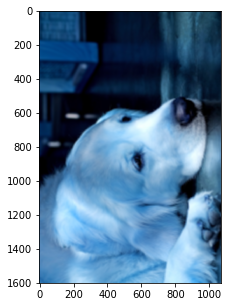

In [41]:
#データ拡張
def get_augmentation():
    train_transform = [
        albu.HorizontalFlip(p=1),
        albu.VerticalFlip(p=1),
        albu.RandomRotate90(p=1),
        albu.Blur(blur_limit=21, p=1)
    ]
    return albu.Compose(train_transform)

transforms = get_augmentation()

img1 = cv2.imread(img_list_aug[1])

img_aug = transforms(image=img1)["image"]

plt.figure(figsize=(8, 5))
plt.imshow(img_aug);

#### 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

In [42]:
#!git clone https://github.com/tzutalin/labelImg

In [43]:
#!pip3 install pyqt5 lxml

In [44]:
#pwd

In [45]:
#cd labelImg/

In [46]:
#!make qt5py3

In [47]:
#cd

In [48]:
path = './train' 
xml_list = glob.glob(path + '/*' + ".xml")
xml_list

['./train/dog5.xml',
 './train/dog4.xml',
 './train/dog3.xml',
 './train/dog2.xml',
 './train/dog1.xml',
 './train/cat1.xml',
 './train/cat2.xml',
 './train/cat3.xml',
 './train/cat4.xml',
 './train/cat5.xml']

In [83]:
# バウンディングボックス　座標
from html.parser import HTMLParser
from bs4 import BeautifulSoup

for xml in xml_list:
    with open(xml) as f:
        soup = BeautifulSoup(f, "html.parser")
        print(soup.find('xmin').get_text(),
              soup.find('ymin').get_text(),
              soup.find('xmax').get_text(),
              soup.find('ymax').get_text(),
              soup.find('width').get_text(),
              soup.find('height').get_text())

470 880 711 1160 800 1200
10 11 1142 1047 1600 1066
530 274 1394 950 1600 1024
470 23 1598 1059 1600 1066
358 412 1562 1048 1600 1068
212 88 459 434 688 480
211 138 1042 661 1600 900
452 477 1517 1137 1600 1200
190 223 1186 823 1600 1066
202 564 998 1044 1600 1124


#### 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

[Using Albumentations to augment bounding boxes for object detection tasks](https://github.com/albumentations-team/albumentations_examples/blob/master/notebooks/example_bboxes.ipynb)

In [57]:
import random

import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import albumentations as A

In [86]:
#画像上の境界ボックスとクラスラベルを視覚化する関数を定義

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

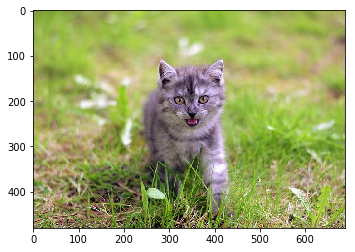

In [87]:
#ディスクからイメージをロード
image = cv2.imread("./train/cat1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [94]:
#境界ボックスを定義
bboxes = [[212, 88, 268, 387]]
category_ids = [1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {1: 'cat', 0: 'dog'}

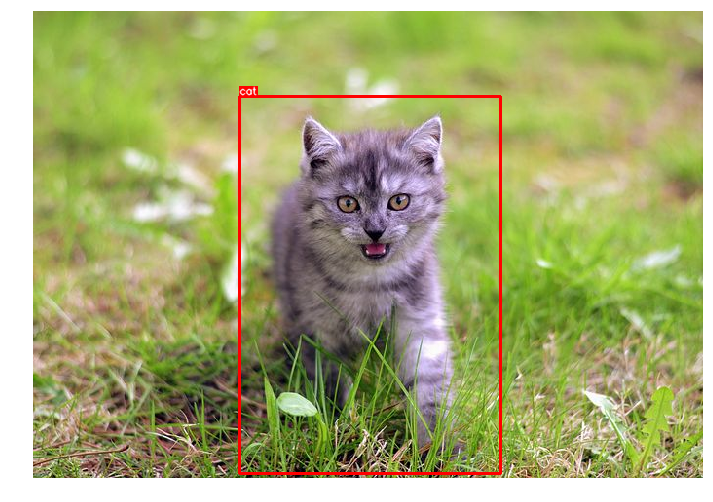

In [95]:
#バウンディングボックスで元の画像を視覚化
visualize(image, bboxes, category_ids, category_id_to_name)

In [96]:
transform = A.Compose(
    [A.HorizontalFlip(p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

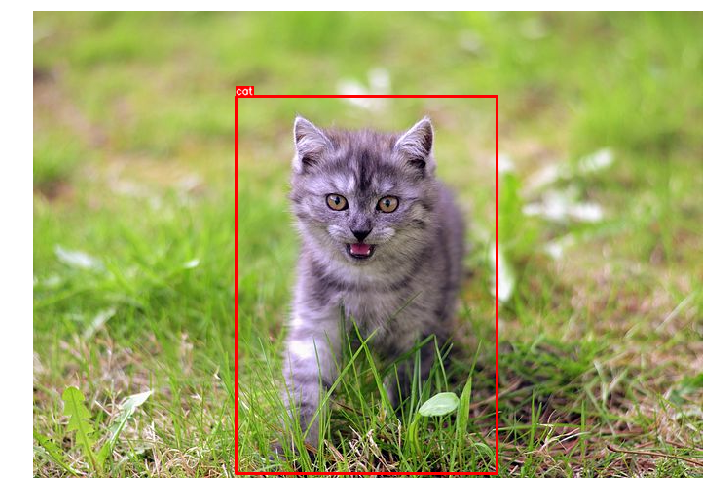

In [97]:
#水平反転
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [98]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

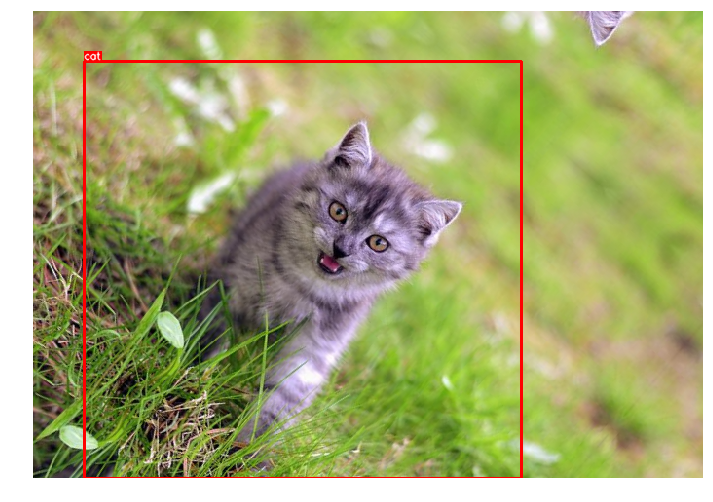

In [100]:
#ランダムにアフィン変換を適用する（平行移動、拡大縮小、回転）
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [101]:
#Define a complex augmentation piepline
#いろいろな処理をまとめて

transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

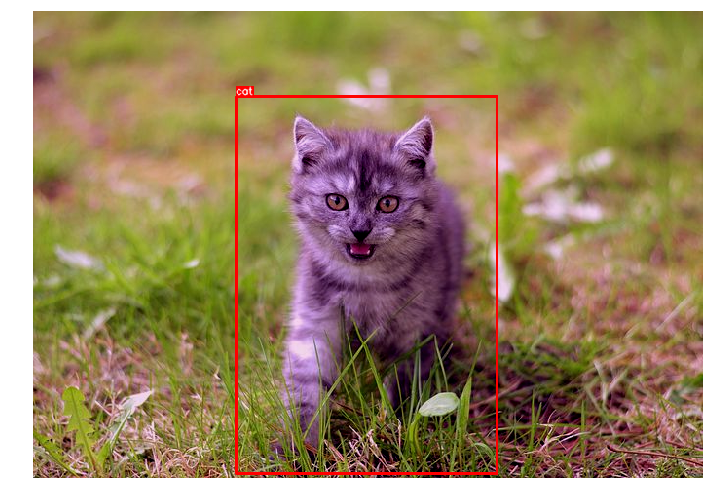

In [103]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)